## INTRODUCTION
* Airbnb is a internet marketplace for short-term home and apartment rentals. 

* It allows you to, for example, rent (list) out your home for a week while you’re away or rent out your empty bedroom.


* Airbnb provides a convenient source of income for people who have otherwise vacant space and for guests looking for affordable and convenient housing options.


* Like any other service, trying to understand the underlying pricing dynamics of the Airbnb market is very important both for hosts and guests. 


* As users continue to grow on both the supply and demand side, homeowners may find it hard to properly price their property. 


* We seek to analyze over 25,000 listings in the Seattle area in order to better understand how the use of listing attributes such as bedrooms, location, type of accommodation, and more can be used to accurately predict the optimal listing price both for the host and guest.

This study therefore us multivariant analysis to answer the question:
* what are the factors that inflence pricing of accommodation on airbnb platform.



#### Import libraries

In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.pipeline import Pipeline
from geopy.distance import great_circle


### Step 1: Loading the data
* The data contain 24678 observations and 106 variables(predictors).


* From the 106 variables price was selected as the responds variable (dependent variable) while 23 were intuitively selected as predictors (independent variables).


In [3]:
# import data
df =pd.read_csv('\\Users\\cofos\\Downloads\\lisitngs.csv')

#define the columns we want to keep

columns_to_included = ['last_scraped','host_since', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'square_feet', 'price', 'cleaning_fee','number_of_reviews',
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'cancellation_policy','require_guest_profile_picture',]

# Select the columns we need for the analysis

df= df[columns_to_included]
df.head()

,last_scraped,host_since,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,cleaning_fee,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,cancellation_policy,require_guest_profile_picture
0,1/4/2016,8/11/2011,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,...,$85.00,NaN,207,NaN,$5.00,2,1,f,moderate,f
1,1/4/2016,2/21/2013,t,Queen Anne,47.639123,-122.365667,Apartment,Entire home/apt,4,1.0,...,$150.00,$40.00,43,$100.00,$0.00,1,2,f,strict,t
2,1/4/2016,6/12/2014,t,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,...,$975.00,$300.00,20,"$1,000.00",$25.00,10,4,f,strict,f
3,1/4/2016,11/6/2013,t,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,...,$100.00,NaN,0,NaN,$0.00,1,1,f,flexible,f
4,1/4/2016,11/29/2011,t,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,...,$450.00,$125.00,38,$700.00,$15.00,6,1,f,strict,f


* Dataframe.info() gives a quick glance at the dataset.
* it gives the shape of the dateset, the datatypes as well as possible missing values

In [4]:
df.columns

Index(['last_scraped', 'host_since', 'host_has_profile_pic',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'bed_type', 'square_feet', 'price', 'cleaning_fee', 'number_of_reviews',
       'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   last_scraped                   3818 non-null   object 
 1   host_since                     3816 non-null   object 
 2   host_has_profile_pic           3816 non-null   object 
 3   neighbourhood_group_cleansed   3818 non-null   object 
 4   latitude                       3818 non-null   float64
 5   longitude                      3818 non-null   float64
 6   property_type                  3817 non-null   object 
 7   room_type                      3818 non-null   object 
 8   accommodates                   3818 non-null   int64  
 9   bathrooms                      3802 non-null   float64
 10  bedrooms                       3812 non-null   float64
 11  bed_type                       3818 non-null   object 
 12  square_feet                    97 non-null     f

* There are indications of some missing values and incorrect datatype that needs to be handle.

* We can also check the percentage of missing values for each column.

* We set the threshold of more than 50% missing values means we will drop that column.

In [6]:
df.isna().sum()/df.shape[0] #checking for percentage of missing values for each column.

last_scraped                     0.000000
host_since                       0.000524
host_has_profile_pic             0.000524
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000262
room_type                        0.000000
accommodates                     0.000000
bathrooms                        0.004191
bedrooms                         0.001572
bed_type                         0.000000
square_feet                      0.974594
price                            0.000000
cleaning_fee                     0.269775
number_of_reviews                0.000000
security_deposit                 0.511262
extra_people                     0.000000
guests_included                  0.000000
minimum_nights                   0.000000
instant_bookable                 0.000000
cancellation_policy              0.000000
require_guest_profile_picture    0.000000
dtype: float64

### Step 2: Data cleaning 

In [7]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    df - pandas dataframe
    This function cleans df using the following steps:
    1. The price column has certain characters such as $ and comma that need to be remove and convert them to float.
    2. Filling missing values with mode for the categorical variables and 0.00 for price columns.
    3. Change columns with dtype object to category.
    '''
#The price column has certain characters such as $ and comma that need to be remove and convert them to float
    df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
    df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)
    df['extra_people'] = df['extra_people'].str.replace('$', '').str.replace(',', '').astype(float)
    df['security_deposit'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)

    #Filling missing values with median for numerical varaibles 
    
    df.loc[df.bedrooms.isnull(), "bedrooms"] = df.groupby('room_type').bedrooms.transform('median')
    df.loc[df.bathrooms.isnull(), "bathrooms"] = df.groupby('room_type').bathrooms.transform('median')
    df['cleaning_fee'].fillna(0.00,inplace=True)
    df['security_deposit'].fillna(0.00,inplace=True)

#fill missing values with mode for categorical variables
 
    df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0]) 
    df['property_type'] = df['property_type'].fillna(df['property_type'].mode()[0])
    df['require_guest_profile_picture'] = df['require_guest_profile_picture'].fillna(df['require_guest_profile_picture'].mode()[0])
    
    #fill in nan's for host since column with back fill and forward fill
    
    df['host_since']= df['host_since'].fillna(method ='ffill').fillna(method ='bfill')
    
# change the datatype of host since to datatime
    df['last_scraped'] = pd.to_datetime(df['last_scraped'])
    df['host_since'] = pd.to_datetime(df['host_since'])
    
    df = df.drop(columns=['square_feet'])

                                                                       
                                                                       
    return df
df = clean_data(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   last_scraped                   3818 non-null   datetime64[ns]
 1   host_since                     3818 non-null   datetime64[ns]
 2   host_has_profile_pic           3818 non-null   object        
 3   neighbourhood_group_cleansed   3818 non-null   object        
 4   latitude                       3818 non-null   float64       
 5   longitude                      3818 non-null   float64       
 6   property_type                  3818 non-null   object        
 7   room_type                      3818 non-null   object        
 8   accommodates                   3818 non-null   int64         
 9   bathrooms                      3818 non-null   float64       
 10  bedrooms                       3818 non-null   float64       
 11  bed_type         

* Our dataset looks clean now

### Step 2 Feature Engineering
* Location and number of years listed might have some influence on pricing.

* Distance from the city center to the accommodation was calculated instead of using neighbourhood.

* I calculated number of years listed by subtracting host_since from last_scraped.

* Also property type has many categoriies. Therefore recategorization into four types, Apartment building, hotels, family house and cabin, yort, boat were all categorized as other

In [9]:
def distance_to_loc(lat, long):
    ''' this function take the latitude and longitude of a location and calculate
        the distance from the location to the center of the city in kilometers
    '''
    center_seattle = (47.6062,-122.3321)
    accommodation = (lat, long)
    return great_circle(center_seattle, accommodation).km
df['distance'] = df.apply(lambda x: distance_to_loc(x.latitude, x.longitude), axis=1)

In [10]:
#Recategorizing property type column.
def get_property_type(col):
    if col == 'Apartment' :
        return 'Apartment_building'
    elif col == 'Condominium':
        return 'Apartment_building'
    elif col == 'Loft':
        return 'Apartment_building'
    elif col == 'Serviced apartment':
        return 'Apartment_building'
    
    elif col == 'House':
        return 'Family_house'
    elif col == 'Townhouse':
        return 'Family_house'
    elif col == 'Bungalow':
        return 'Family_house'
    
    elif col == 'Hotel':
        return 'Hotel'
    elif col == 'Bed & Breakfast':
        return 'Hotel'
    elif col == 'Hostel':
        return 'Hotel'
    elif col == 'Boutique hotel':
        return 'Hotel'
    elif col == 'Guest suite':
        return 'Hotel'
    elif col == 'Guesthouse':
        return 'Hotel'
    elif col == 'Aparthotel':
        return 'Hotel'
    
    else:
        return 'others'
df['property_type'] = df['property_type'].apply(get_property_type)

In [11]:
df['no_years_listed'] = round((df['last_scraped'] - df['host_since']).dt.days/365,1)

In [13]:
def get_neighbourhood(col):
    if col == 'Capitol Hill' :
        return 'Capitol Hill'
    elif col == 'Downtown':
        return 'Downtown'
    elif col == 'Central Area':
        return 'Central Area'
    elif col == 'Queen Anne':
        return 'Queen Anne'
    
    elif col == 'Ballard ':
        return 'Ballard '
    elif col == 'West Seattle':
        return 'West Seattle'
    else:
        return 'others neighbourhood'
df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].apply(get_neighbourhood)

In [15]:
#drop columns I will not need in the analysis

df = df.drop(columns = ['last_scraped','host_since','bed_type','latitude','longitude'],axis =1)

We find correlation of the numeric variables and passed it to a heatmap function. This is the outcome:

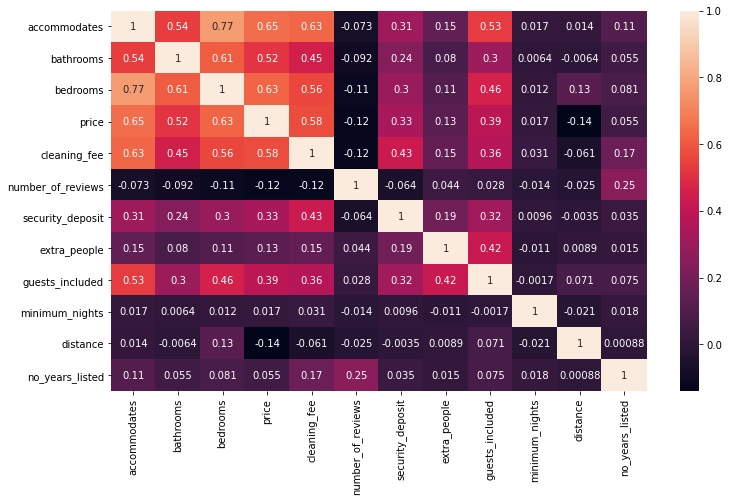

In [16]:
df_numeric = df.select_dtypes(include=['float64', 'int64', ]).copy()
plt.figure(figsize=(12,7))
corrMatrix = df_numeric.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

(array([2.244e+03, 1.147e+03, 2.720e+02, 9.300e+01, 3.500e+01, 1.300e+01,
        5.000e+00, 4.000e+00, 1.000e+00, 4.000e+00]),
 array([  20.,  118.,  216.,  314.,  412.,  510.,  608.,  706.,  804.,
         902., 1000.]),
 <a list of 10 Patch objects>)

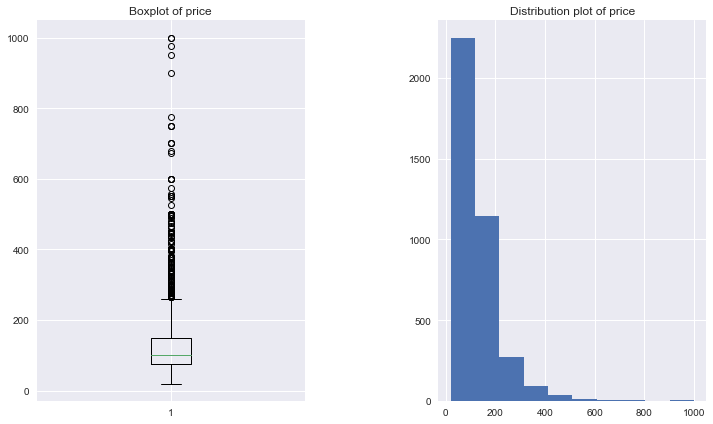

In [17]:
# Investigate the responds variable
# hist plot to check the distribution of responds variable
#boxplot to check for outliers
plt.style.use('seaborn')
plt.figure(figsize=(12,7))
plt.subplots_adjust(hspace= .5,wspace =.5 )
plt.subplot(1,2,1)
plt.title('Boxplot of price')
plt.boxplot((df['price']))
plt.subplot(1,2,2)
plt.title('Distribution plot of price')
plt.hist((df['price']))

(array([  23.,  167.,  527.,  958., 1027.,  679.,  282.,  114.,   28.,
          13.]),
 array([3.04452244, 3.43094567, 3.81736891, 4.20379214, 4.59021537,
        4.97663861, 5.36306184, 5.74948508, 6.13590831, 6.52233155,
        6.90875478]),
 <a list of 10 Patch objects>)

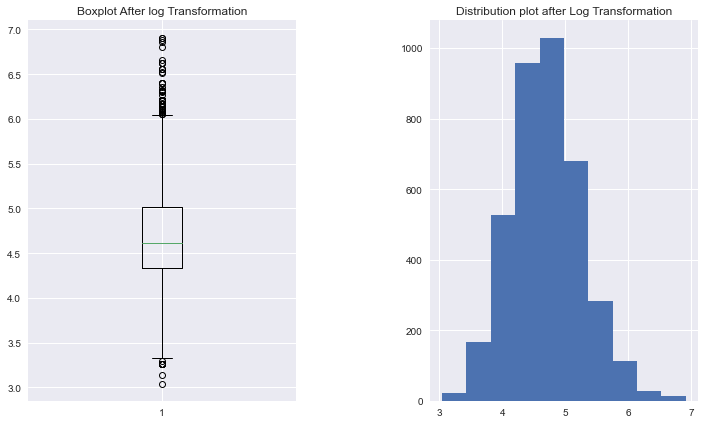

In [18]:
plt.style.use('seaborn')
plt.figure(figsize=(12,7))
plt.subplots_adjust(hspace= .5,wspace =.5 )
plt.subplot(1,2,1)
plt.title('Boxplot After log Transformation')
plt.boxplot(np.log1p(df['price']))
plt.subplot(1,2,2)
plt.title('Distribution plot after Log Transformation')
plt.hist(np.log1p(df['price']))

In [19]:
x = df.drop('price',axis =1)
Y= df['price']
df_numeric = x.select_dtypes(include=['float64', 'int64', ]).copy()
df_cat = x.select_dtypes(include=['object']).copy()
sc = StandardScaler()
data = sc.fit_transform(df_numeric)
df_num = pd.DataFrame(data, columns = df_numeric.columns)
X = pd.concat([df_num,df_cat], axis=1)
df= pd.concat([X,Y],axis = 1)

In [20]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,distance,no_years_listed,host_has_profile_pic,neighbourhood_group_cleansed,property_type,room_type,instant_bookable,cancellation_policy,require_guest_profile_picture,price
0,0.329029,-0.438461,-0.348068,-0.902932,4.897864,-0.592215,-0.322324,0.249756,-0.083987,-0.166782,1.350221,t,Queen Anne,Apartment_building,Entire home/apt,f,moderate,f,85.0
1,0.329029,-0.438461,-0.348068,-0.101445,0.550724,-0.170908,-0.606680,-0.513098,-0.022651,-0.165881,0.388979,t,Queen Anne,Apartment_building,Entire home/apt,f,strict,t,150.0
2,3.869138,5.500872,4.183643,5.108217,-0.058936,3.620858,0.815098,6.352583,0.100020,-0.356003,-0.444098,t,Queen Anne,Family_house,Entire home/apt,f,strict,f,975.0
3,-0.176701,-0.438461,-1.480996,-0.902932,-0.589075,-0.592215,-0.606680,-0.513098,-0.083987,-0.134190,-0.059601,t,Queen Anne,Apartment_building,Entire home/apt,f,flexible,f,100.0
4,1.340489,1.258492,1.917787,1.601714,0.418189,2.356936,0.246387,3.301169,-0.083987,-0.228783,1.157973,t,Queen Anne,Family_house,Entire home/apt,f,strict,f,450.0


In [22]:
df.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'number_of_reviews', 'security_deposit', 'extra_people',
       'guests_included', 'minimum_nights', 'distance', 'no_years_listed',
       'host_has_profile_pic', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'price'],
      dtype='object')

In [23]:
model = smf.ols(formula='np.log1p(price) ~ distance +number_of_reviews +bathrooms + bedrooms + cleaning_fee+ security_deposit+extra_people+ guests_included + accommodates + bathrooms+ minimum_nights+no_years_listed +C(host_has_profile_pic)+ C(instant_bookable)+C(room_type)+C(property_type)+C(neighbourhood_group_cleansed)+C(cancellation_policy)',data=df)
results = model.fit()
# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(results.summary()
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

* In determing the factors that influence pricing OLS model was used to established a possibe relationship between the dependent variable and the predictors. 

* The results of the model is shown in the table above; the model has Adj R-square value of 0.663, which mean 66% of variability in the dependent variable is explained by the model. This imply that there are other factors that contribute to pricing that are not accounted for in our model.

* In interpreting the categorical variable it is important to note which of the categories is being used as baseline or reference.


* we recategorized the type property listed into four categorized: Apartment building(Apartment,Condominium,loft),family house(house,townhouse), hotel, and other.  As compare to apartment building, renting a room in a family house or entire house saw 3% increase in price while  hotel saw 32% increase in price.Renting  Boat, yort, increase price by 10%.


* The type of room also has significant influence on price, As compared to renting an entire building, shared room 89% drop in price while private room also 39% drop in price. 



* In terms of distance from the city center, every additional Km saw price dropping by almost 8%



* Also increasing the number of people that room can accomodate  saw increase of 8% by every one person increase.


* Having additional bathroom and bedroom increase price by 3% and 14% respectively, while all other factors are kept constant



In [24]:
table = sm.stats.anova_lm(results, typ=1) # Anova table to check the overall effect of each factor
table

,df,sum_sq,mean_sq,F,PR(>F)
C(host_has_profile_pic),1.0,0.149228,0.149228,1.411166,2.349373e-01
C(instant_bookable),1.0,0.980062,0.980062,9.267883,2.348077e-03
C(room_type),2.0,460.997636,230.498818,2179.695477,0.000000e+00
C(property_type),3.0,28.914491,9.638164,91.142600,5.967648e-57
C(neighbourhood_group_cleansed),5.0,49.558336,9.911667,93.728968,2.555628e-93
C(cancellation_policy),2.0,13.108393,6.554196,61.979287,3.260879e-27
distance,1.0,6.539001,6.539001,61.835597,4.829727e-15
number_of_reviews,1.0,9.787264,9.787264,92.552556,1.156634e-21
bathrooms,1.0,100.104205,100.104205,946.628206,9.093086e-186
bedrooms,1.0,100.805424,100.805424,953.259234,6.398038e-187


* The analysis of varaince (Anova) results, gives the overall influence of each feature.

* Using the P-value, and with alpha value of 0.05, the results shows that number of years listed, minimum night, number of extra people and presence of host profile picture had no significant influence on pricing.g


### Conclusion
* This study sheds light on the relationship between Airbnb listing prices and their price determinants.


* These findings can provide implications for stakeholders such as Airbnb hosts to gain a better understanding of the market situation and formulate a suitable pricing strategy.


* The limitation of this study is that R2 of the model is relatively low, indicating that the factors affecting Airbnb listing prices have not been fully explored.


* Future studies will explore the influence of other factors on Airbnb listing prices, like the attributes of an Airbnb listing (amenities, neighbourhood, etc.)